In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
df = pd.read_csv('data/iris.data.csv')

In [3]:
df.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
x = df[['sepal length','sepal width','petal length','petal width']]
y = df['class']

In [ ]:
#Normalizar os dados com MinMaxScaler(), transforma recursos dimensionando cada recurso em um intervalo deteminado. 
#Por padrao é 0 e 1. Ou seja, esse estimador dimensiona e traduz cada caracteristica individualmente de modo que esteja entre 0 e 1.

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

## Clusterizando usando Scipy

In [9]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng]) #monta uma array N x N com zeros preenchidos
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j]) # calcula a distancia euclidiana dos pontos e armazena na array

In [ ]:
#em clustering aglomerativo, em cada iteração, o algoritmo deve atualizar a matriz de distância para refletir a distância do cluster recém-formado com os clusters restantes na floresta. Os seguintes métodos são suportados no Scipy para calcular a distância entre o cluster recém-formado e cada um:

#- single
#- complete
#- avarage
#- weighted
#- centroid

In [10]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\LauraDamacenodeAlmei\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters
#Essencialmente, o armazenamento em cluster hierárquico não requer um número pré-especificado de clusters. 
#No entanto, em alguns aplicativos, queremos uma partição de clusters desarticulares, assim como no cluster simples. 


array([3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 4, 6, 4, 5, 4, 6, 5, 4, 6, 4, 6, 4,
       4, 6, 4, 6, 4, 4, 4, 4, 4, 4, 4, 9, 4, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       6, 6, 6, 4, 6, 5, 6, 6, 6, 4, 5, 6, 8, 4, 8, 9, 9, 7, 4, 8, 9, 7,
       9, 9, 9, 4, 9, 9, 9, 7, 7, 4, 8, 4, 7, 4, 9, 8, 4, 4, 9, 8, 8, 7,
       9, 4, 4, 7, 8, 9, 4, 9, 8, 9, 4, 8, 8, 9, 9, 9, 9, 4], dtype=int32)

In [ ]:
#Podemos também especificar o numero de clusters
#from scipy.cluster.hierarchy import fcluster
#k = 5
#clusters = fcluster(Z, k, criterion='maxclust')
#clusters

# Clusterizando com Scikit-learn

In [13]:
# Calcular a matriz de distancia
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [14]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

In [15]:
df['cluster_'] = agglom.labels_
df.head()

,sepal length,sepal width,petal length,petal width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'petal length')

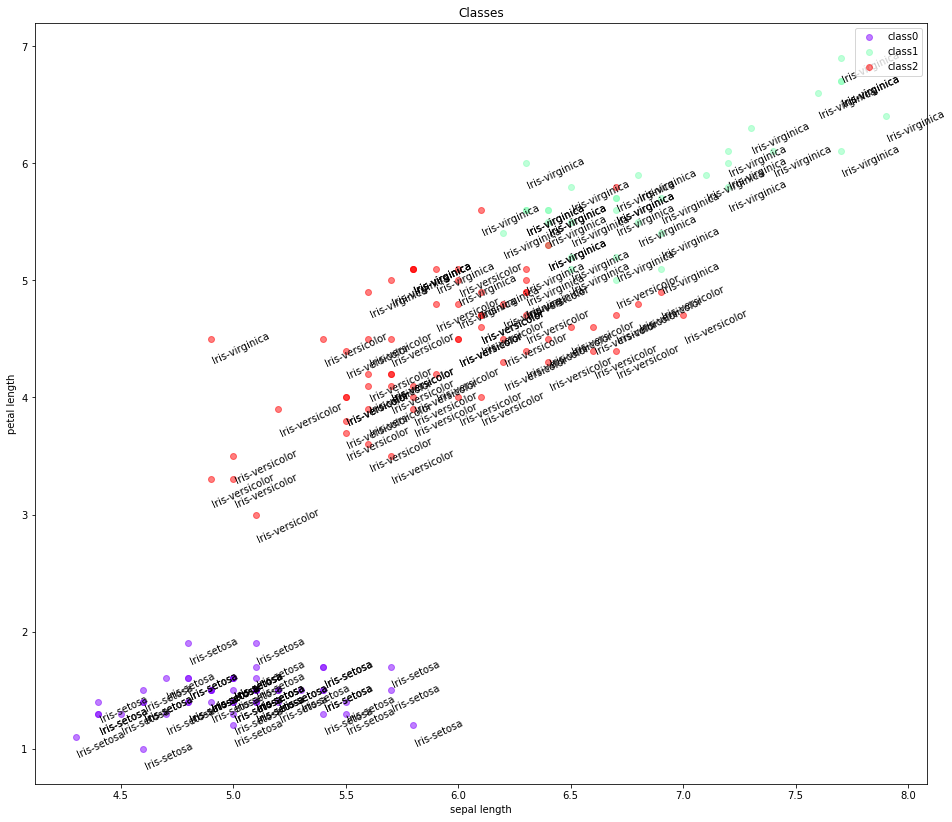

In [20]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
# Cria uma figura de tamanho 6x4 polegadas
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset['sepal length'][i], subset['petal length'][i],str(subset['class'][i]), rotation=25) 
    plt.scatter(subset['sepal length'], subset['petal length'], c=color, label='class'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Classes')
plt.xlabel('sepal length')
plt.ylabel('petal length')

In [21]:
df.groupby(['cluster_','class'])['cluster_'].count()

cluster_  class          
0         Iris-setosa        50
1         Iris-versicolor     1
          Iris-virginica     33
2         Iris-versicolor    49
          Iris-virginica     17
Name: cluster_, dtype: int64

In [23]:
agg_cars = df.groupby(['cluster_','class'])['sepal length','sepal width','petal length','petal width'].mean()
agg_cars

sepal length  sepal width  petal length  petal width
cluster_ class                                                                
0        Iris-setosa          5.006000     3.418000      1.464000     0.244000
1        Iris-versicolor      6.700000     3.000000      5.000000     1.700000
         Iris-virginica       6.893939     3.118182      5.806061     2.133333
2        Iris-versicolor      5.920408     2.765306      4.244898     1.318367
         Iris-virginica       5.994118     2.694118      5.058824     1.817647